In [2]:
# read csv
import pandas as pd
df = pd.read_csv('housing.csv')

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


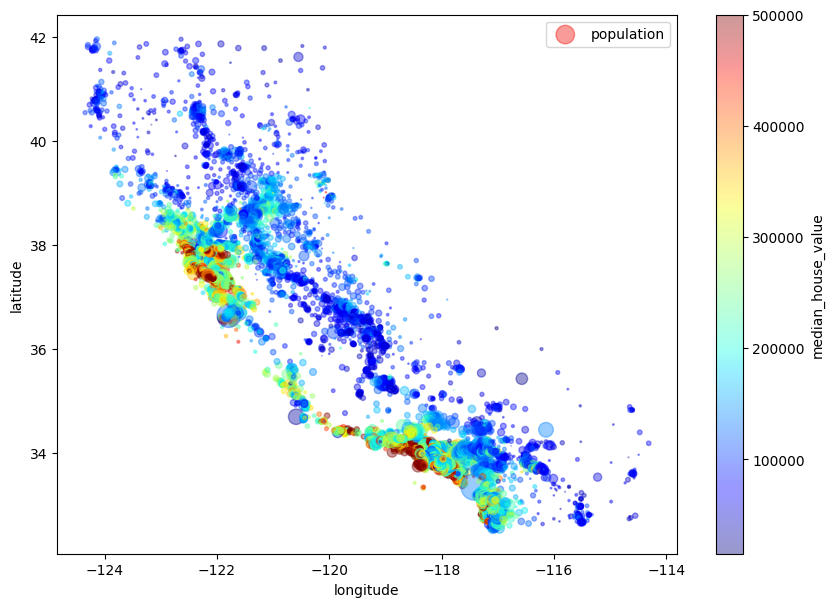

In [5]:
# Show longitudes and latitudes on map of California
import matplotlib.pyplot as plt
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

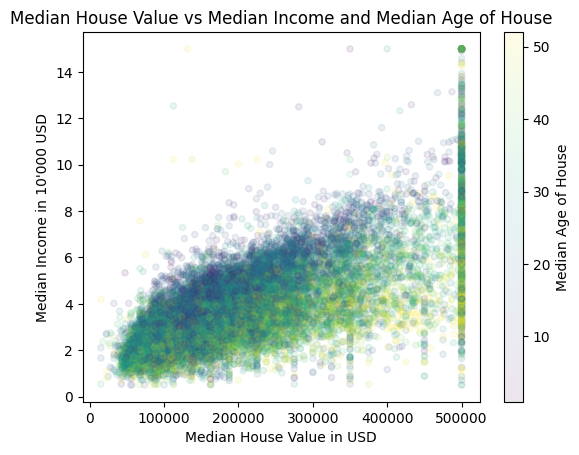

In [6]:
# Scatterplot median_house_value vs population
scatter = df.plot(kind="scatter", x="median_house_value", y="median_income", alpha=0.1, c='housing_median_age', cmap=plt.get_cmap("viridis"), colorbar=False)
plt.title("Median House Value vs Median Income and Median Age of House")
plt.ylabel("Median Income in 10'000 USD")
plt.xlabel("Median House Value in USD")

cbar = plt.colorbar(scatter.collections[0])
cbar.set_label('Median Age of House')

plt.show()

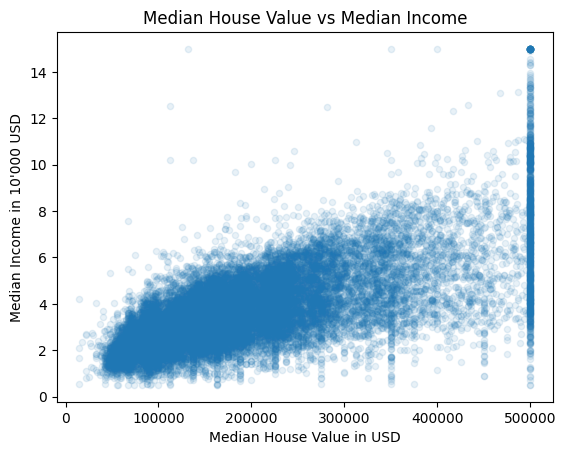

In [7]:
df.plot(kind="scatter", x="median_house_value", y="median_income", alpha=0.1)
plt.title("Median House Value vs Median Income")
plt.ylabel("Median Income in 10'000 USD")
plt.xlabel("Median House Value in USD")
plt.show()

<Axes: xlabel='median_house_value', ylabel='housing_median_age'>

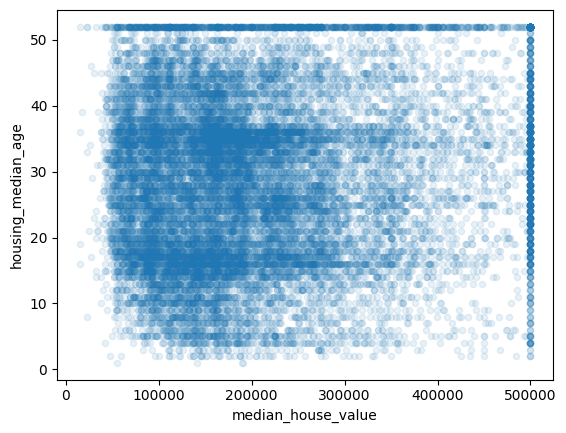

In [8]:
df.plot(kind="scatter", x="median_house_value", y="housing_median_age", alpha=0.1)

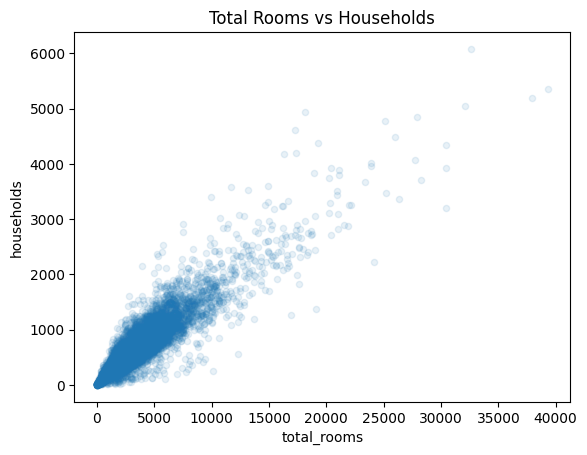

In [9]:
df.plot(kind="scatter", x="total_rooms", y="households", alpha=0.1)
plt.title("Total Rooms vs Households")
plt.show()

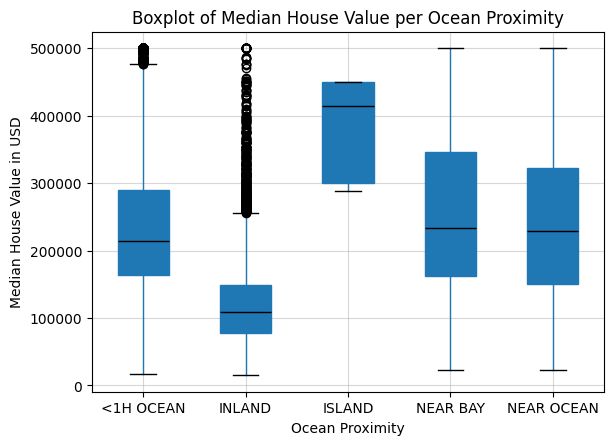

In [10]:
# Boxplots of median_house_value per ocean_proximity
# Fill boxplot with colors and make median line black
# Make grid alpha 0.5
df.boxplot(column="median_house_value", by="ocean_proximity", patch_artist=True, medianprops=dict(color="black"))
plt.title("Boxplot of Median House Value per Ocean Proximity")
plt.suptitle("")
plt.ylabel("Median House Value in USD")
plt.xlabel("Ocean Proximity")
plt.grid(alpha=0.5)
plt.show()

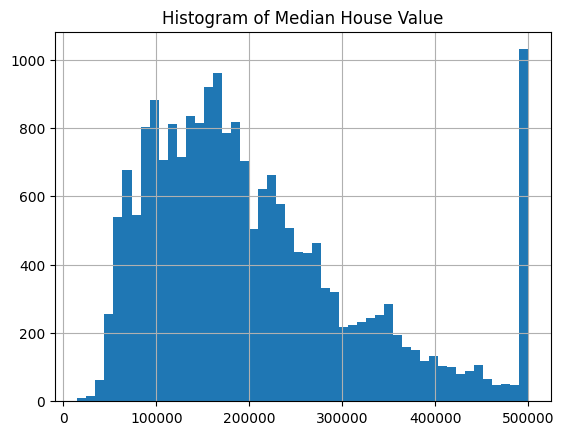

In [11]:
# Histogram of median_house_value
df["median_house_value"].hist(bins=50)
plt.title("Histogram of Median House Value")
plt.show()

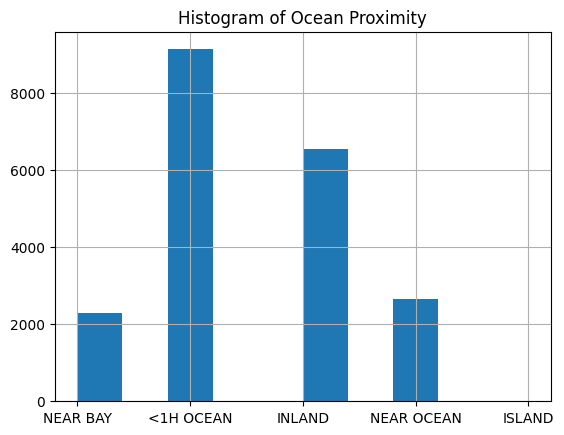

In [12]:
# Histogram of ocean_proximity
df["ocean_proximity"].hist()
plt.title("Histogram of Ocean Proximity")
plt.show()

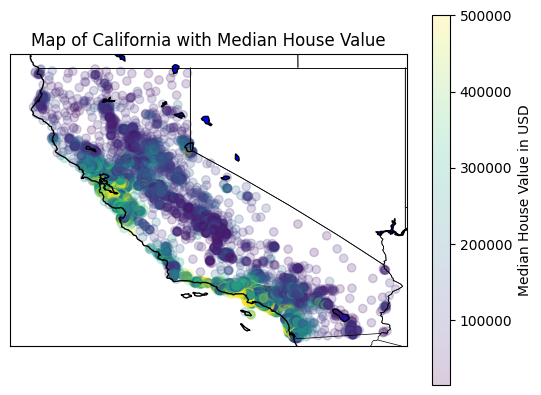

In [16]:
# Make map of California with Squares and color them by median_house_value
from mpl_toolkits.basemap import Basemap

map = Basemap(projection='cea', llcrnrlat=32.3, urcrnrlat=42.5, llcrnrlon=-125, urcrnrlon=-114, resolution='i')

map.drawcoastlines()
map.drawcountries()
map.drawstates()
map.fillcontinents(color = 'White', lake_color='Blue')
x, y = map(df['longitude'].values, df['latitude'].values)
map.scatter(x, y, c=df['median_house_value'], cmap='viridis', alpha=0.2)
plt.colorbar(label='Median House Value in USD')
plt.title("Map of California with Median House Value")
plt.show()